In [1]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2

In [2]:
categories = ["with_mask","without_mask"]

In [3]:
data = []
for catagory in categories:
    path = os.path.join("train",catagory)
    label = categories.index(catagory)
    for file in os.listdir(path):
        ## join path in file name
        img_path = os.path.join(path,file)
        ## reading image using cv2
        img = cv2.imread(img_path)
        ## resize image using cv2
        img = cv2.resize(img,(224,224))
        
        data.append([img,label])

In [4]:
len(data)

1507

In [5]:
import random
random.shuffle(data)

In [6]:
X = []
y = []
for features,label in data:
    X.append(features)
    y.append(label)

In [7]:
len(y)

1507

In [8]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [9]:
X.shape

(1507, 224, 224, 3)

In [10]:
y.shape

(1507,)

In [11]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [12]:
##standardzing x data
X = X/255

In [13]:
X[0]

array([[[0.63137255, 0.67843137, 0.71764706],
        [0.62745098, 0.67843137, 0.71764706],
        [0.61960784, 0.67843137, 0.71372549],
        ...,
        [0.09803922, 0.17254902, 0.23921569],
        [0.10196078, 0.18823529, 0.25490196],
        [0.10196078, 0.19215686, 0.25490196]],

       [[0.63137255, 0.67843137, 0.71764706],
        [0.62745098, 0.67843137, 0.71764706],
        [0.61960784, 0.67843137, 0.71372549],
        ...,
        [0.10588235, 0.18039216, 0.24705882],
        [0.10980392, 0.19607843, 0.25882353],
        [0.10588235, 0.19607843, 0.25882353]],

       [[0.63137255, 0.67843137, 0.71764706],
        [0.62745098, 0.67843137, 0.71764706],
        [0.61960784, 0.67843137, 0.71372549],
        ...,
        [0.11764706, 0.19215686, 0.25882353],
        [0.11764706, 0.20392157, 0.26666667],
        [0.11372549, 0.20392157, 0.26666667]],

       ...,

       [[0.25882353, 0.25490196, 0.29019608],
        [0.25882353, 0.25490196, 0.29019608],
        [0.25882353, 0

In [14]:
### deviding train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [15]:
##shape of x_train
X_train.shape

(1205, 224, 224, 3)

In [16]:
## shape of x_test
X_test.shape

(302, 224, 224, 3)

## TRANSFER LEARNING (VGG16)

In [17]:
from keras.applications.vgg16 import VGG16
vgg = VGG16()

In [18]:
## checking the arctiture of VGG16 model
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
## importing librabary for making last layer for vgg16 for our projects
from keras import Sequential
model = Sequential()

In [20]:
## replacing the last layer of vgg16 with our layer
for layer in vgg.layers[:-1]:
    model.add(layer)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [22]:
## freezing all the code of vgg16 
for layer in model.layers:
    layer.trainable = False

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [24]:
## adding last layer 
from keras.layers import Dense

In [25]:
model.add(Dense(1,activation = "sigmoid"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [27]:
##compiling the model
model.compile(optimizer = "Adam",loss = "binary_crossentropy",metrics = ['accuracy'])

In [28]:
## fitiing the value to the model

history = model.fit(X_train,y_train,epochs=5,validation_data = (X_test,y_test))

Epoch 1/5
38/38 [==============================] - 240s 6s/step - loss: 0.4331 - accuracy: 0.8581 - val_loss: 0.3305 - val_accuracy: 0.8974
Epoch 2/5
38/38 [==============================] - 181s 5s/step - loss: 0.2629 - accuracy: 0.9212 - val_loss: 0.2709 - val_accuracy: 0.9040
Epoch 3/5
38/38 [==============================] - 184s 5s/step - loss: 0.2141 - accuracy: 0.9344 - val_loss: 0.1971 - val_accuracy: 0.9272
Epoch 4/5
38/38 [==============================] - 212s 6s/step - loss: 0.1705 - accuracy: 0.9502 - val_loss: 0.1969 - val_accuracy: 0.9238
Epoch 5/5
38/38 [==============================] - 199s 5s/step - loss: 0.1566 - accuracy: 0.9568 - val_loss: 0.1549 - val_accuracy: 0.9536


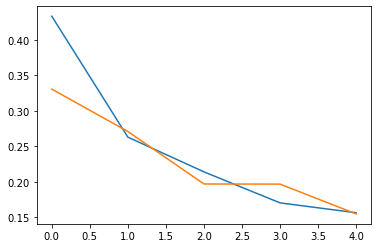

In [29]:
# ## plotting the loss and val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

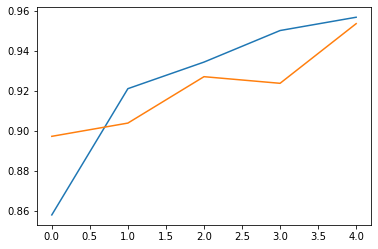

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## video strimg 

In [37]:
## caputre the video using opencv
cap = cv2.VideoCapture(0)

In [32]:
## 
def detect_face_mask(img):
    """
    detecting the mask of peroson inside the video 
    """
    y_pred = np.argmax(model.predict(X)> 0.5).astype("int32")
    return y_pred [0][0]

In [33]:
## DRAW LABEL IN THE WINDOW TO DETECT (WITH_MASK,WITHOUT_MASK)
def draw_label(img,text,pos,bg_colour):
    """
    this function take image, sentecnce to print,
    position to print text,colour of the textas an 
    input and hellp us to identify the out put resut
    as output
    """
    # fatching text size using opencv (text,fontface,scall of font,thickness of font)
    text_size = cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)
    
    end_x = pos[0] + text_size[0][0] + 2
    end_y = pos[1] + text_size[0][1] - 2
    
    cv2.rectangle(img,pos,(end_x,end_y),bg_colour,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)

In [34]:
harr = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def detect_face(img):
    """
    this function take image as an argument and give
    us 4 point and their place in the image,make
    a rectange and detect the face"""
    
    ##
    coods = haar.detectMultiScale(img)
    
    print(coods)

In [35]:
while True:
    ret ,frame = cap.read()
    
    coods = detect_face(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    for x,y,w,h in coods:  
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)
         
    cv2.imshow("window",frame)

    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
cv2.destroyAllWindows()

In [36]:
while True:
    
    ret ,frame = cap.read()
    
    ##resizing the input image
    img = cv2.resize(frame,(224,224))
    
    ## detacting the face mask
    y_pred = detect_face_mask(img)
    
    ## face detaction using harcascade
    coods = detect_face(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    for x,y,w,h in coods:  ## 4 cordinate of faces
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)
    
    ## detacting mask and printing out put on screen
    if y_prd == 0:
        draw_label(frame,"Mask",(30,30),(0,255,0))
    else:
        draw_label(frame,"No mask",(30,30),(0,0,255))
    
    ## drawing the Project label in the output video frame
    draw_label(frame,"Face mask detection",(30,30),(225,0,0))
    
    ## showning the window usning cv2
    cv2.imshow("window",frame)
    
    ## writing a code for keep video on and to close press x
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
##destroying the window      
cv2.destroyAllWindows()

48/48 [==============================] - 180s 4s/step


IndexError: invalid index to scalar variable.